In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
! pip install missingno
import missingno as mno
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv("../input/bluebook-for-bulldozers/TrainAndValid.csv",parse_dates=['saledate'])

In [4]:
print("The shape of the data is",df.shape)
print("There are",df.shape[0],"rows")
print("There are",df.shape[1],"columns")

The shape of the data is (412698, 53)
There are 412698 rows
There are 53 columns


In [5]:
df.sample(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
143536,1511043,85000.0,1189848,7018,132,1.0,1977,NaN,NaN,1989-09-19,245,245,NaN,NaN,NaN,Large / Medium,"Hydraulic Excavator, Track - 50.0 to 66.0 Metr...",Washington,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
336570,2349994,27500.0,1726803,4605,136,1.0,2004,0.0,NaN,2008-08-21,310G,310,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Arizona,BL,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141160,1504855,31500.0,834565,4139,132,2.0,1977,NaN,NaN,1995-11-11,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Ohio,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
381391,4281360,9000.0,315499,3537,172,1.0,1000,0.0,NaN,2009-05-01,416B,416,B,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Nevada,BL,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266222,1802731,5000.0,1232603,9522,132,1.0,1998,NaN,NaN,2006-08-24,553,553,NaN,NaN,NaN,NaN,Skid Steer Loader - 701.0 to 976.0 Lb Operatin...,Texas,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302801,2247656,12500.0,751561,43,136,1.0,1991,0.0,NaN,2010-02-12,416II,416,NaN,II,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,California,BL,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355354,2431311,13500.0,1501234,9579,136,1.0,2003,0.0,NaN,2010-06-02,S250,S250,NaN,NaN,NaN,NaN,Skid Steer Loader - 2201.0 to 2701.0 Lb Operat...,Maryland,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,Manual,None or Unspecified,None or Unspecified,High Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88848,1394714,8750.0,1380383,3771,132,2.0,1963,NaN,NaN,1997-09-06,922B,922,B,NaN,NaN,NaN,Wheel Loader - 90.0 to 100.0 Horsepower,New York,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
361749,2503082,27000.0,1910005,13247,149,1.0,2005,1615.0,Low,2011-03-08,580MII,580,M,II,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Washington,BL,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [7]:
# numerical variables
nums=df.describe().T
nums

,count,mean,std,min,25%,50%,75%,max
SalesID,412698.0,2.011161e+06,1.080068e+06,1139246.0,1421897.75,1645852.5,2261012.50,6333349.0
SalePrice,412698.0,3.121518e+04,2.314174e+04,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,412698.0,1.230061e+06,4.539533e+05,0.0,1088593.25,1284397.0,1478079.25,2486330.0
ModelID,412698.0,6.947202e+03,6.280825e+03,28.0,3261.00,4605.0,8899.00,37198.0
datasource,412698.0,1.351694e+02,9.646749e+00,121.0,132.00,132.0,136.00,173.0
auctioneerID,392562.0,6.585268e+00,1.715841e+01,0.0,1.00,2.0,4.00,99.0
YearMade,412698.0,1.899050e+03,2.921902e+02,1000.0,1985.00,1995.0,2001.00,2014.0
MachineHoursCurrentMeter,147504.0,3.522988e+03,2.716993e+04,0.0,0.00,0.0,3209.00,2483300.0


In [8]:
numcols=nums.index.tolist()
print(numcols)
print("There are",len(nums),"numerical variables")


['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter']
There are 8 numerical variables


In [9]:
# categorical variables
cats=df.describe(include=["O"]).T

In [10]:
catcols = cats.index.tolist()
print(catcols)
print(len(catcols))

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']
44


## **DATA PREPROCESSING**
* Data is of mixed data types
* Date is already changed to datetime 
* There are 8 numerical variables, 44 categorical variables
* Sale Price is the target variable
* 13 non-null variables.

In [11]:
null_columns = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()*100 / df.shape[0], columns =["Percentage of null values"])
null_columns["Total Nan Values"]=df[df.columns[df.isnull().any()]].isnull().sum()
# null_columns=null_columns.sort_values(by=['Percentage of null values'])
null_columns

,Percentage of null values,Total Nan Values
auctioneerID,4.879113,20136
MachineHoursCurrentMeter,64.258610,265194
UsageBand,82.149174,339028
fiSecondaryDesc,34.099269,140727
fiModelSeries,85.784520,354031
fiModelDescriptor,81.871490,337882
ProductSize,52.485110,216605
Drive_System,74.051970,305611
Enclosure,0.080931,334
Forks,52.092087,214983


* More than 5% is missing for every column
* Only 1 column has < 1 % missing , the other has 4.8% missing
* CCA on Enclosure column, Impute auctioneer ID

In [12]:
# make a list of all the null columns
null_cols = null_columns.index.tolist()
print(null_cols)

['auctioneerID', 'MachineHoursCurrentMeter', 'UsageBand', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


<AxesSubplot:>

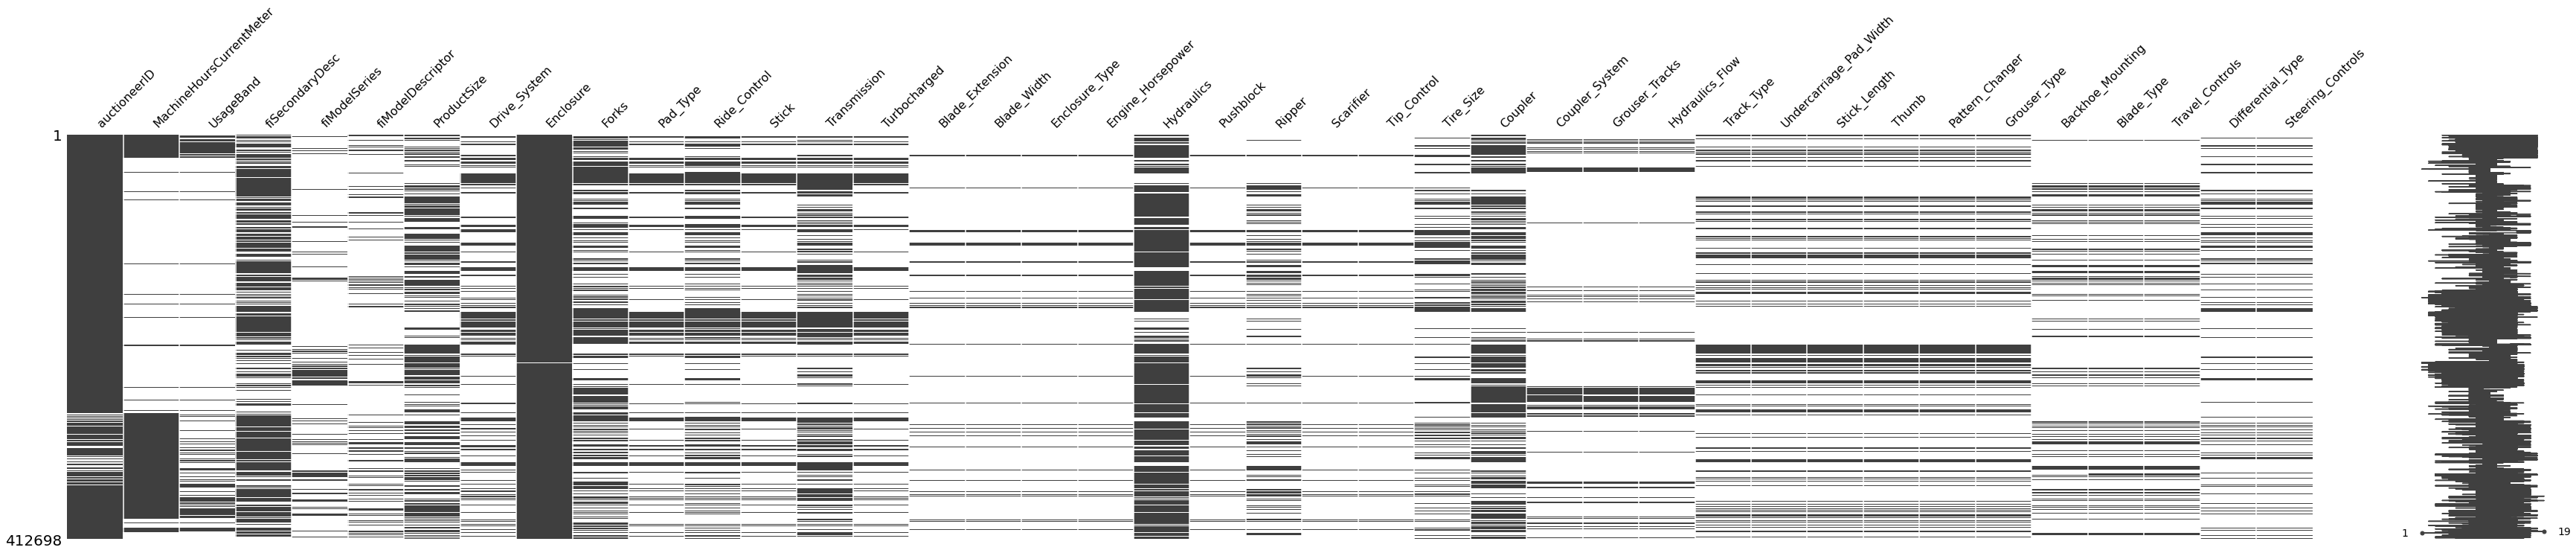

In [13]:
# heatmap to visualize the missing columns
mno.matrix(df[null_cols], figsize=(60,10))

<AxesSubplot:>

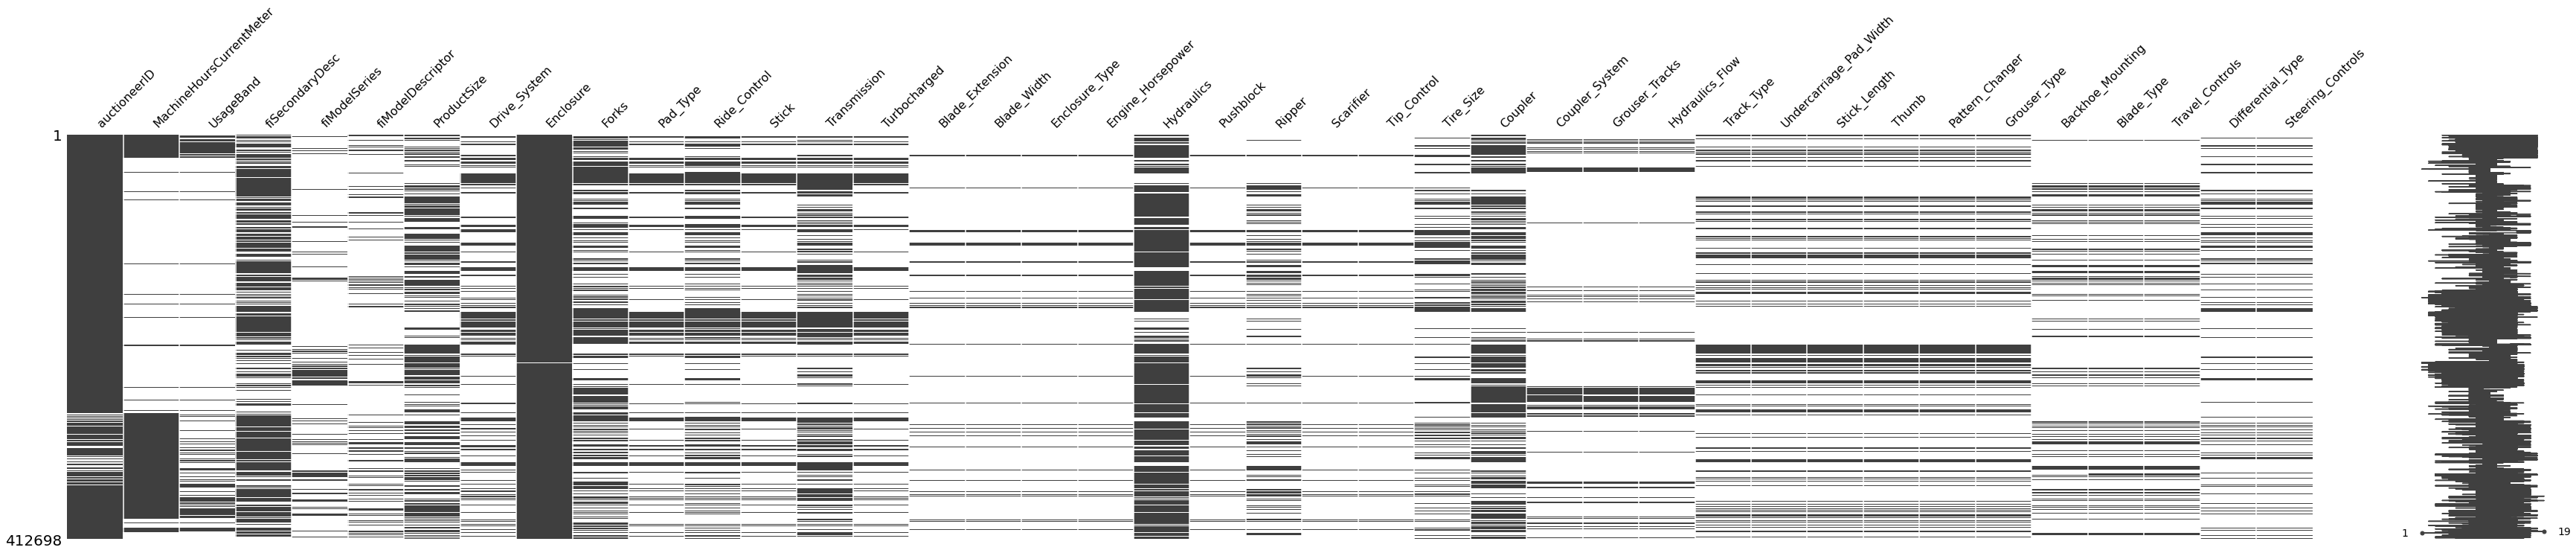

In [14]:
# heatmap to visualize the missing columns
mno.matrix(df[null_cols], figsize=(60,10))

<AxesSubplot:>

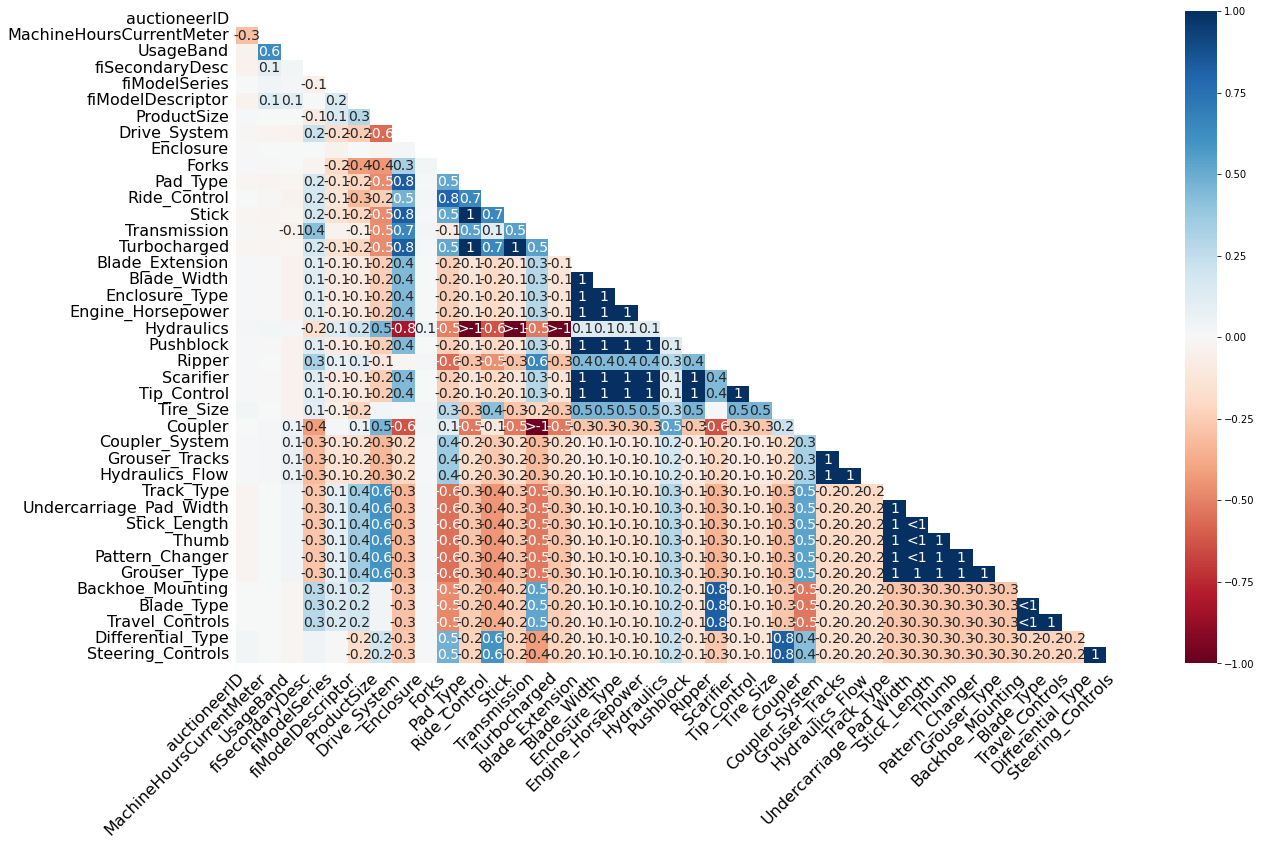

In [15]:
mno.heatmap(df)

# **INSIGHTS**
**POSITIVE CORRELATION**
* Stick :: Pad_Type                              
* Turbocharged :: Pad_Type
* Turbocharged :: Stick
* Blade_Width :: Blade_Extension
* Enclosure_Type :: Blade_Extension
* Enclosure_Type :: Blade_Width
* Engine_Horsepower :: Blade_Extension
* Engine_Horsepower:: Blade_Width
* Engine_Horsepower :: Enclosure_Type
* Pushblock :: Blade_Extension 
* Pushblock :: Blade_Width
* Pushblock ::Enclosure_Type
* Pushblock ::Engine_Horsepower
* Scarifier :: Blade_Extension
* Scarifier :: Blade_Width
* Scarifier :: Enclosure_Type
* Scarifier :: Engine_Horsepower
* Scarifier :: Pushblock
* Tip_Control :: Scarifier
* Tip_Control :: Engine_Horsepower
* Tip_Control :: Enclosure_Type
* Tip_Control :: Blade_Width
* Tip_Control :: Blade_Extension
* Tip_Control :: Pushblock
* Grouser_Tracks :: Coupler_System
* Hydraulics_Flow :: Coupler_System Grouser_Tracks
* Hydraulics_Flow ::  Grouser_Tracks
* Undercarriage_Pad_Width :: Track_Type
* Stick_Length :: Track_Type
* Stick_Length :: Undercarriage_Pad_Width
* Thumb :: Track_Type
* Thumb :: Undercarriage_Pad_Width
* Thumb :: Stick_Length
* Pattern_Changer ::  Track_Type
* Pattern_Changer :: Thumb
* Pattern_Changer :: Undercarriage_Pad_Width
* Pattern_Changer :: Stick_Length
* Grouser_Type :: Track_Type
* Grouser_Type :: Undercarriage_Pad_Width
* Grouser_Type :: Stick_Length
* Grouser_Type :: Thumb
* Grouser_Type :: Pattern_Changer
* Blade_Type :: Backhoe_Mounting
* Travel_Controls :: Backhoe_Mounting
* Travel_Controls :: Blade_Type
* Steering_Controls :: Differential_TypE
* Hydraulics :: Pad_Type
* Hydraulics :: Stick
* Hydraulics :: Turbocharged
* Coupler :: Transmission

**NEGATIVE CORRELATION**
* Hydraulics :: Pad_Type
* Hydraulics :: Stick
* Hydraulics :: Turbocharged
* Coupler :: Transmission

**MCAR**
1. Enclosure (<1%)
**MAR**
1. 
* Undercarriage_Pad_Width
* Thumb
* Pattern_Changer
* Stick_Length
* Grouser_Type
* Track_Type
2. 
* Travel_Controls
* Blade_Type
* Backhoe_Mounting
3.
* Stick
* Turbocharged
* Pad_Type
4. 
* Differential_Type
* Steering_Controls
5. 
* Coupler_System
* Grouser_Tracks
* Hydraulics_Flow
6. 
* Scarifier
* Tip_Control
* Pushblock
* Engine_Horsepower
* Enclosure_Type
* Blade_Width
* Blade_Extension






In [16]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:>

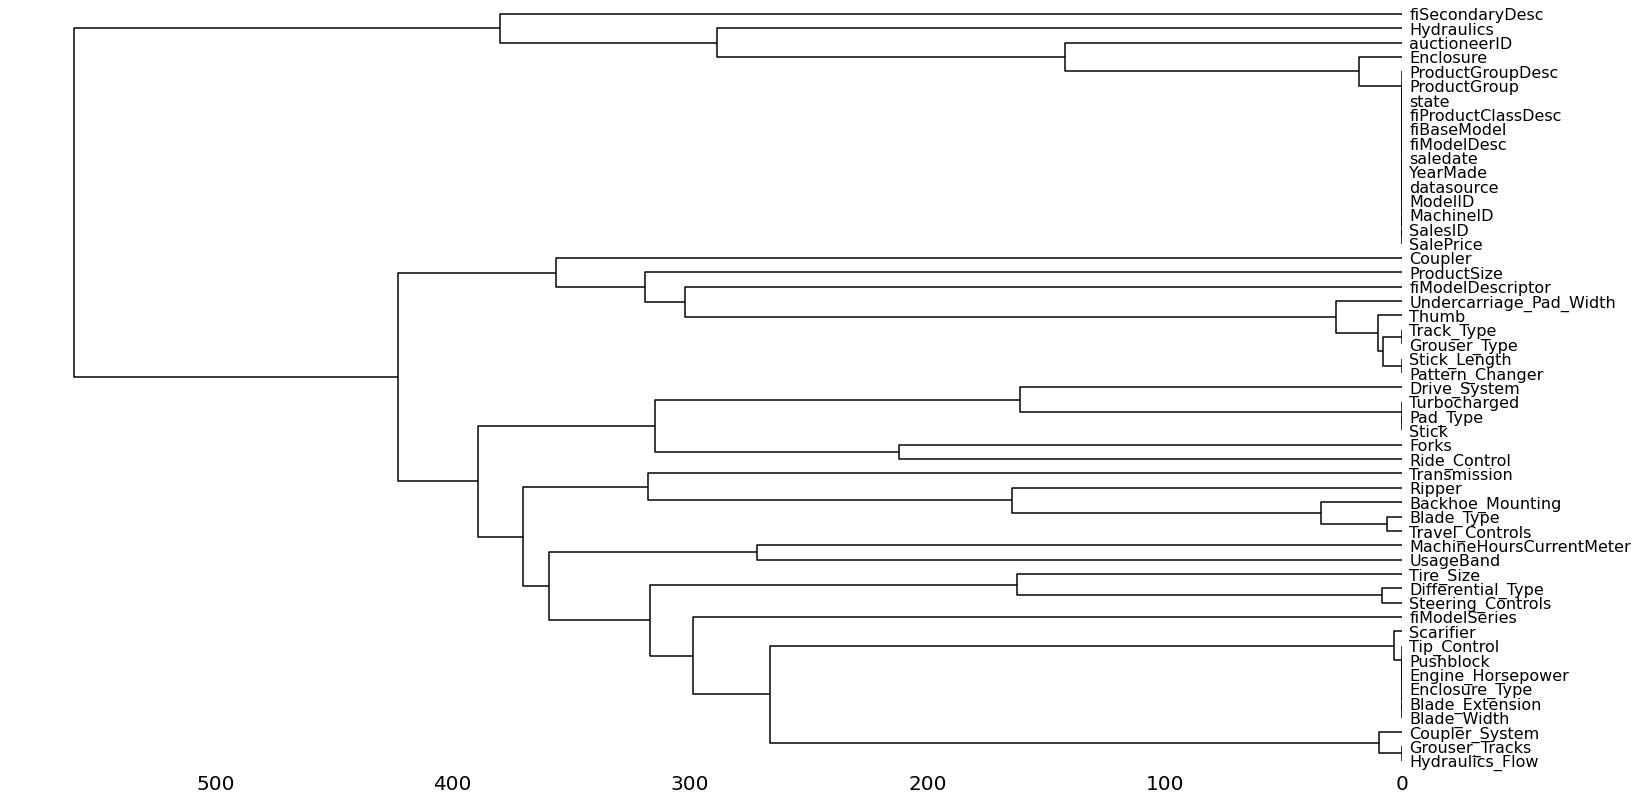

In [17]:
mno.dendrogram(df)

In [18]:
# duplicate entries
print("Duplicate entries initially:", df.duplicated().sum())
df = df.drop_duplicates(keep=False)
print("Duplicate entries after dropping:", df.duplicated().sum())

Duplicate entries initially: 0
Duplicate entries after dropping: 0


In [19]:
for column in df.columns:
    print(column + ":" + str(len(df[column].unique())))
    if(len(df[column].unique())<100):
        print(column + ':' + str(df[column].unique()))
    print('\n')

SalesID:412698


SalePrice:954


MachineID:348808


ModelID:5281


datasource:6
datasource:[121 132 136 149 172 173]


auctioneerID:31
auctioneerID:[ 3.  1.  2. 11.  4.  7. 99.  6.  5. 18. 17. 22. 20. 14. 16. 21.  9. 13.
 12. 23. 10. 15. 19.  8. 28. 25. 27. 24. nan  0. 26.]


YearMade:73
YearMade:[2004 1996 2001 2007 1993 2008 1000 1998 1999 2003 1991 2000 2005 1995
 2006 2002 1984 1988 1980 1992 1987 1997 1971 1978 1989 1985 1979 1976
 1994 1982 1990 1974 1968 1966 1983 1986 1981 1970 1977 1975 1973 1965
 1967 2009 2010 1969 1972 1964 1957 1958 1963 1919 1920 1950 1948 1952
 1942 1956 1954 1953 1955 1959 1960 1961 1962 1951 1937 1949 1947 2012
 2013 2011 2014]


MachineHoursCurrentMeter:15634


UsageBand:4
UsageBand:['Low' 'High' 'Medium' nan]


saledate:4013


fiModelDesc:5059


fiBaseModel:1961


fiSecondaryDesc:178


fiModelSeries:130


fiModelDescriptor:141


ProductSize:7
ProductSize:[nan 'Medium' 'Small' 'Large / Medium' 'Mini' 'Large' 'Compact']


fiProductClassDesc:74
fiProduc

In [20]:
# looking at unique values yto know which data types to change
pd.set_option("Display.max_rows", None)
# nunique counts the unique values in every column and dropna=true means we ignore nan values and .sort sorts the values in ascending order
print(df.nunique(dropna=True).sort_values())

Engine_Horsepower                2
Stick                            2
Pushblock                        2
Scarifier                        2
Forks                            2
Grouser_Tracks                   2
Track_Type                       2
Coupler_System                   2
Turbocharged                     2
Backhoe_Mounting                 2
Blade_Extension                  2
UsageBand                        3
Hydraulics_Flow                  3
Pattern_Changer                  3
Coupler                          3
Tip_Control                      3
Grouser_Type                     3
Enclosure_Type                   3
Ride_Control                     3
Thumb                            3
Ripper                           4
Differential_Type                4
Drive_System                     4
Pad_Type                         4
Steering_Controls                5
ProductGroupDesc                 6
ProductGroup                     6
datasource                       6
Blade_Width         

In [21]:
# dataframe with null columns
mynull_cols = df[null_cols]
mynull_cols.sample(10)

,auctioneerID,MachineHoursCurrentMeter,UsageBand,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
226088,2.0,NaN,NaN,NaN,NaN,NaN,Mini,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
118875,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,Single Shank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
356874,1.0,0.0,NaN,G,NaN,NaN,NaN,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
328274,99.0,0.0,NaN,B,NaN,NaN,Medium,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
79769,4.0,4100.0,Medium,F,II,NaN,Medium,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
172248,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,17.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
188101,1.0,NaN,NaN,D,NaN,NaN,NaN,Two Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207546,1.0,NaN,NaN,NaN,NaN,NaN,Medium,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
369650,99.0,0.0,NaN,E,NaN,NaN,NaN,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44878,2.0,NaN,NaN,L,NaN,NaN,NaN,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# categoical features
categoricalfeatures = df.select_dtypes(include='object').columns
cat=df[categoricalfeatures].copy()
catdf=pd.DataFrame(cat)
cat.sample(5)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
67742,NaN,966C,966,C,NaN,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,Colorado,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
228413,NaN,SK250LC,SK250,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Florida,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
146689,NaN,966E,966,E,NaN,NaN,Medium,Wheel Loader - 200.0 to 225.0 Horsepower,Mississippi,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
346861,NaN,WB140-2,WB140,NaN,-2,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Extended,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132761,NaN,330L,330,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",Washington,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,Manual,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [23]:
numericalfeatures = df.select_dtypes(include='number').columns
num=df[numericalfeatures].copy()
numdf=pd.DataFrame(num)
num.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
32503,1265683,37000.0,1270743,22312,132,13.0,2004,386.0
2084,1146197,9000.0,1043165,7110,121,3.0,1987,0.0
21098,1212491,28500.0,1065092,18111,121,3.0,2004,3806.0
273979,1817883,8100.0,1101286,5561,132,9.0,1000,NaN
137526,1496521,18500.0,59924,3537,132,7.0,1995,NaN


# **HANDLING MISSING VALUES**
 **1.COMPLETE CASE ANALYSIS**

In [24]:
# look for columns that have less than 5% missing null values
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]
cols

['auctioneerID', 'Enclosure']

In [25]:
df[cols].sample(7)

,auctioneerID,Enclosure
97675,1.0,OROPS
304760,NaN,OROPS
273063,2.0,OROPS
313920,5.0,EROPS w AC
122589,2.0,OROPS
252434,4.0,EROPS
147978,1.0,OROPS


In [26]:
# see how much you lose when you drop them all
len(df[cols].dropna())/len(df)

0.9504092581015658

In [27]:
dfnew = df[cols].dropna()
df.shape, dfnew.shape

((412698, 53), (392232, 2))

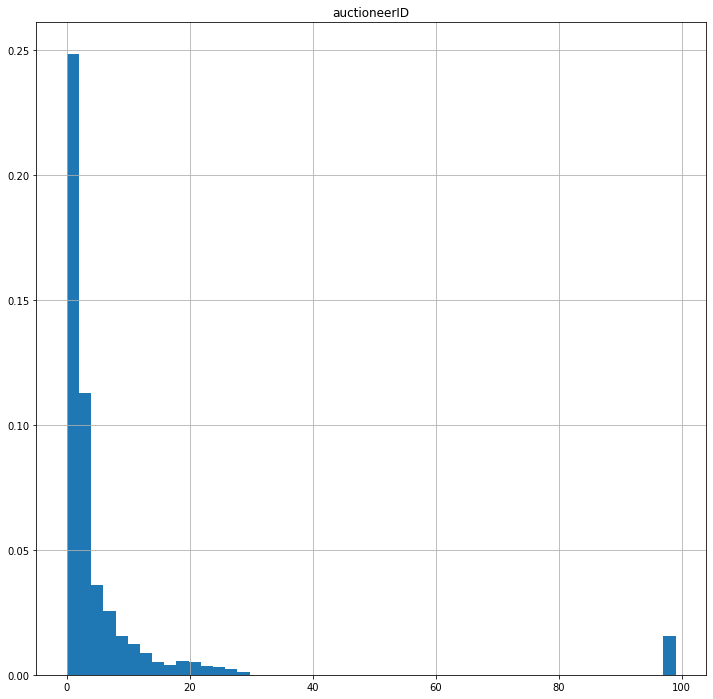

In [28]:
# visualize the distribution 
dfnew.hist(bins=50,density = True, figsize = (12,12))
dfnew.columns
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

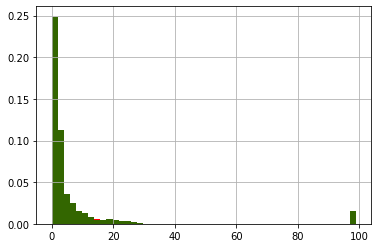

In [29]:
# check for changes in the distribution for numerical variables
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['auctioneerID'].hist(bins=50,ax=ax,density = True, color='red')
# data after cca
dfnew['auctioneerID'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)
plt.show

<AxesSubplot:ylabel='Density'>

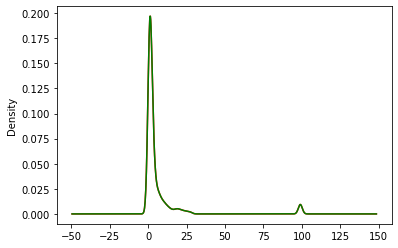

In [30]:
# density plot () for numeric variables only
fig=plt.figure()
ax = fig.add_subplot(111)
df['auctioneerID'].plot.density(color='red')
dfnew['auctioneerID'].plot.density(color='green')

In [31]:
# percentage change for categorical variables
temp =pd.concat([
    df['Enclosure'].value_counts()/len(df),
    dfnew['Enclosure'].value_counts()/len(dfnew)
],
axis=1)
temp.columns=['original','cca']
temp

,original,cca
OROPS,0.431238,0.431994
EROPS,0.343518,0.343865
EROPS w AC,0.224380,0.224082
EROPS AC,0.000044,0.000046
NO ROPS,0.000007,0.000008
None or Unspecified,0.000005,0.000005


# **FINDINGS**
CCA does not work at all so we won't use it.

**2. MEAN/MEDIAN IMPUTATION FOR NUMERICAL VARIABLES**

In [32]:
df.isnull().mean()

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [33]:
nullnumcols = [var for var in num.columns if num[var].isnull().mean()>0]
numimpute=df[nullnumcols].copy()
numimpute.isna().mean()

auctioneerID                0.048791
MachineHoursCurrentMeter    0.642586
dtype: float64

In [34]:
numimpute.columns

Index(['auctioneerID', 'MachineHoursCurrentMeter'], dtype='object')

In [35]:
X = numimpute
y = df['SalePrice']

In [36]:
XTrain,XTest, YTrain, YTest = train_test_split(X,y,test_size=0.2,random_state=33)

In [37]:
print('The shape of XTrain is',XTrain.shape)
print('The shape of XTest is',XTest.shape)
print('The shape of YTrain is',YTrain.shape)
print('The shape of YTest is',YTest.shape)

The shape of XTrain is (330158, 2)
The shape of XTest is (82540, 2)
The shape of YTrain is (330158,)
The shape of YTest is (82540,)


In [38]:
XTrain.isnull().mean()

auctioneerID                0.048674
MachineHoursCurrentMeter    0.642750
dtype: float64

In [39]:
# mean and median imputation on auctioneer ID
auctioneerID_mean=XTrain['auctioneerID'].mean()
auctioneerID_median=XTrain['auctioneerID'].median()
# mean imputation
XTrain['auctioneerID_mean'] = XTrain['auctioneerID'].fillna(auctioneerID_mean)
# median imputation
XTrain['auctioneerID_median'] = XTrain['auctioneerID'].fillna(auctioneerID_median)


In [40]:
# mean and median imputation on MachineHoursCurrentMeter
MachineHoursCurrentMeter_mean = XTrain['MachineHoursCurrentMeter'].mean()
MachineHoursCurrentMeter_median = XTrain['MachineHoursCurrentMeter'].median()
# mean imputation
XTrain['MachineHoursCurrentMeter_mean'] = XTrain['MachineHoursCurrentMeter'].fillna(MachineHoursCurrentMeter_mean)
# median imputation
XTrain['MachineHoursCurrentMeter_median'] = XTrain['MachineHoursCurrentMeter'].fillna(MachineHoursCurrentMeter_median)

In [41]:
XTrain.sample(10)

,auctioneerID,MachineHoursCurrentMeter,auctioneerID_mean,auctioneerID_median,MachineHoursCurrentMeter_mean,MachineHoursCurrentMeter_median
323804,13.0,0.0,13.0,13.0,0.000000,0.0
69870,5.0,NaN,5.0,5.0,3551.022747,2.0
352424,16.0,0.0,16.0,16.0,0.000000,0.0
216477,2.0,NaN,2.0,2.0,3551.022747,2.0
127456,3.0,NaN,3.0,3.0,3551.022747,2.0
396007,99.0,NaN,99.0,99.0,3551.022747,2.0
274177,10.0,NaN,10.0,10.0,3551.022747,2.0
99467,12.0,NaN,12.0,12.0,3551.022747,2.0
204824,1.0,NaN,1.0,1.0,3551.022747,2.0
346988,2.0,0.0,2.0,2.0,0.000000,0.0


In [42]:
# check for the change in variance in both variables
print("Variance of MachineHoursCurrentMeter is:", XTrain['MachineHoursCurrentMeter'].var())
print("Variance of the mean of MachineHoursCurrentMeter is:", XTrain['MachineHoursCurrentMeter_mean'].var())
print("Variance of median of MachineHoursCurrentMeter is:", XTrain['MachineHoursCurrentMeter_median'].var())

print("Variance of MachineHoursCurrentMeter is:", XTrain['auctioneerID'].var())
print("Variance of the mean of auctioneerID is:", XTrain['auctioneerID_mean'].var())
print("Variance of median of auctioneerID is:", XTrain['auctioneerID_median'].var())


Variance of MachineHoursCurrentMeter is: 774966589.8769456
Variance of the mean of MachineHoursCurrentMeter is: 276855433.4537992
Variance of median of MachineHoursCurrentMeter is: 279747666.5612038
Variance of MachineHoursCurrentMeter is: 291.68474489643125
Variance of the mean of auctioneerID is: 277.4873362378668
Variance of median of auctioneerID is: 278.4470869328182


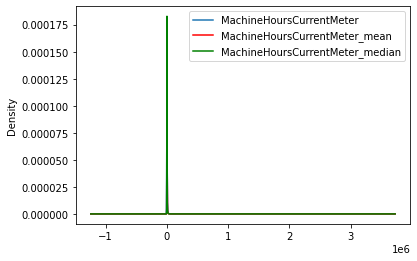

In [43]:
# check for change in distribution
fig = plt.figure()
ax = fig.add_subplot(111)
XTrain["MachineHoursCurrentMeter"].plot(kind='kde',ax=ax)
XTrain['MachineHoursCurrentMeter_mean'].plot(kind='kde',ax=ax,color = 'red')
XTrain['MachineHoursCurrentMeter_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

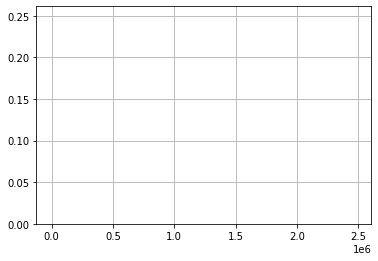

In [44]:
# check for changes in the distribution for numerical variables
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
XTrain['auctioneerID'].hist(bins=50,ax=ax,density = True, color='red')
XTrain['MachineHoursCurrentMeter_mean'].hist(bins=50,ax=ax,density = True, color='magenta')
# data after cca
XTrain['MachineHoursCurrentMeter_median'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)
plt.show

In [45]:
# ideally we would want the variance the variance not disturbed
# more change , change in covariance with other variables
XTrain.cov()

,auctioneerID,MachineHoursCurrentMeter,auctioneerID_mean,auctioneerID_median,MachineHoursCurrentMeter_mean,MachineHoursCurrentMeter_median
auctioneerID,291.684745,1.366935e+04,291.684745,291.684745,4.476151e+03,3.769968e+03
MachineHoursCurrentMeter,13669.347580,7.749666e+08,11919.665830,11087.380392,7.749666e+08,7.749666e+08
auctioneerID_mean,291.684745,1.191967e+04,277.487336,277.487336,4.258279e+03,3.586469e+03
auctioneerID_median,291.684745,1.108738e+04,277.487336,278.447087,3.960947e+03,2.783891e+03
MachineHoursCurrentMeter_mean,4476.150701,7.749666e+08,4258.279380,3960.946890,2.768554e+08,2.768554e+08
MachineHoursCurrentMeter_median,3769.967930,7.749666e+08,3586.469217,2783.891038,2.768554e+08,2.797477e+08


In [46]:
XTrain.corr()

,auctioneerID,MachineHoursCurrentMeter,auctioneerID_mean,auctioneerID_median,MachineHoursCurrentMeter_mean,MachineHoursCurrentMeter_median
auctioneerID,1.000000,0.032773,1.000000,1.000000,0.019520,0.016331
MachineHoursCurrentMeter,0.032773,1.000000,0.026036,0.024139,1.000000,1.000000
auctioneerID_mean,1.000000,0.026036,1.000000,0.998275,0.015363,0.012872
auctioneerID_median,1.000000,0.024139,0.998275,1.000000,0.014266,0.009975
MachineHoursCurrentMeter_mean,0.019520,1.000000,0.015363,0.014266,1.000000,0.994817
MachineHoursCurrentMeter_median,0.016331,1.000000,0.012872,0.009975,0.994817,1.000000


# **FINDINGS**
* Only two numerical colummns have missing values.
* auctioneerID (4%), MachineHoursCurrentMeter (64%)
* Using the mean/ median imputation on auctioneer ID changes the distribution of the data
* No significant change in distribution on mean/median imputation for MachineHoursCurrentMeter.
* The change in variance leads to change in covariance hence change in correlation.

<AxesSubplot:>

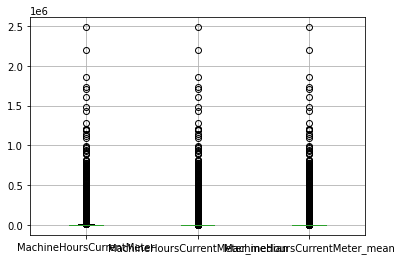

In [47]:
# check for ouliers
# box plot to check for outliers
XTrain[['MachineHoursCurrentMeter','MachineHoursCurrentMeter_median', 'MachineHoursCurrentMeter_mean']].boxplot()